In [1]:
# programmer - Sophia Quinton
# date - 11-10-21
# class - DSC -530
# assignment - Assignment 2

##libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from kneed import KneeLocator

In [2]:
##load data (Lecun et. al., 1998) (Laporte, 2016)
from mnist import MNIST
mndata = MNIST('C:\\Users\\sophi\\OneDrive\\Desktop\\Graduate Classes\\DSC - 540 Machine Learning\\Week 2')
images, labels = mndata.load_training()
images_test, labels_test = mndata.load_testing()


In [3]:
#identify the variables in the dataset and define Euclidean distance 
#between an element in test and training
## the labels represent the Y data and the images are the X variables
##(Bhalley, 2020) (Brownlee, 2020)
from math import sqrt
def euclidean_dist(imA, imB):
    #based on the pythagorean theorem
    distance = 0.0
    for i in range(len(imA)-1):
        distance += (imA[i] - imB[i]) **2
    return sqrt(distance)
##calculate the difference between two images example
images_array = np.array(images)
images_test_array = np.array(images_test)
print("Example of calculating the euclidean Distance of two elements training set: ", euclidean_dist(images_array[0], images_array[2]))
print("Example of calculating the euclidean Distance of two elements testing set: ", euclidean_dist(images_test_array[0], images_test_array[2]))
print("Example of calculating the euclidean Distance of two elements from each: ", euclidean_dist(images_array[5], images_test_array[5]))



Example of calculating the euclidean Distance of two elements training set:  2773.149112471235
Example of calculating the euclidean Distance of two elements testing set:  2176.560819274297
Example of calculating the euclidean Distance of two elements from each:  2509.1213601577742


In [4]:
#K-Nearest neighbor calculations (sklearn, n.d.)
neigh = KNeighborsClassifier(n_neighbors=10)
kModel = neigh.fit(images, labels)

In [5]:
#calculate the distance between the test elements and each of neighbors
##test1
print("Train to neighbors: ", kModel.kneighbors([images_array[0]]))
##test2
print("Test to neighbors: ", kModel.kneighbors([images_test_array[2]]))
##test3
print("Test to neighbors: ", kModel.kneighbors([images_test_array[2]]))


Train to neighbors:  (array([[   0.        , 1561.47238208, 1591.60139482, 1594.71909752,
        1596.70942879, 1604.44694521, 1604.887535  , 1605.70918911,
        1609.69438093, 1613.70474375]]), array([[    0, 32248,  8728, 18932, 30483, 24149, 42338, 52295, 26251,
        50173]], dtype=int64))
Test to neighbors:  (array([[321.66286699, 332.46353183, 341.04838366, 367.71456321,
        377.33009421, 416.66533333, 429.1340117 , 431.8471952 ,
        439.3529333 , 442.75726984]]), array([[58741, 46512, 15224, 47333, 44038, 42531, 39364, 53361, 12578,
        27684]], dtype=int64))
Test to neighbors:  (array([[321.66286699, 332.46353183, 341.04838366, 367.71456321,
        377.33009421, 416.66533333, 429.1340117 , 431.8471952 ,
        439.3529333 , 442.75726984]]), array([[58741, 46512, 15224, 47333, 44038, 42531, 39364, 53361, 12578,
        27684]], dtype=int64))


In [6]:
len(labels)

60000

In [7]:
#count the occurence of each digit and find most popular digit
##the number of each digit
def count_occurence(y_data):
    count_list = [0,0,0,0,0,0,0,0,0,0]
    for number in y_data:
        if number == 0:
            count_list[0] += 1
        elif number == 1:
            count_list[1] += 1
        elif number == 2:
            count_list[2] += 1
        elif number == 3:
            count_list[3] += 1
        elif number == 4:
            count_list[4] += 1
        elif number == 4:
            count_list[4] += 1
        elif number == 5:
            count_list[5] += 1
        elif number == 6:
            count_list[6] += 1
        elif number == 7:
            count_list[7] += 1
        elif number == 8:
            count_list[8] += 1
        elif number == 9:
            count_list[9] += 1
        else:
            print("issue!")
    return count_list

train_counter = count_occurence(labels)
train_counter

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [8]:
for i in range(len(train_counter)):
    print("The number of ", i, "'s", train_counter[i])

The number of  0 's 5923
The number of  1 's 6742
The number of  2 's 5958
The number of  3 's 6131
The number of  4 's 5842
The number of  5 's 5421
The number of  6 's 5918
The number of  7 's 6265
The number of  8 's 5851
The number of  9 's 5949


In [9]:
##find max
def find_max(list):
    max_num = max(list)
    for i in range(len(list)):
        if max_num == list[i]:
            print("The most popular number is ", i)
find_max(train_counter)


The most popular number is  1


In [10]:
kModel.predict([images[0]])[0]

5

In [11]:
len(images[0])

784

In [12]:
##determine what is in each group
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []
group_6 = []
group_7 = []
group_8 = []
group_9 = []
group_10 = []

for sample in range(1,100):
    group = kModel.predict([images[sample]])[0]
    
    if group == 0:
        group_1.append(sample)
    elif group == 1:
        group_2.append(sample)
    elif group == 2:
        group_3.append(sample)
    elif group == 3:
        group_4.append(sample)
    elif group == 4:
        group_5.append(sample)
    elif group == 5:
        group_6.append(sample)
    elif group == 6:
        group_7.append(sample)
    elif group == 7:
        group_8.append(sample)
    elif group == 8:
        group_9.append(sample)
    elif group == 9:
        group_10.append(sample)

def count_occurence_groups(y_data, group):
    count_list = [0,0,0,0,0,0,0,0,0,0]
    for number in group:
        if y_data[number] == 0:
            count_list[0] += 1
        elif y_data[number] == 1:
            count_list[1] += 1
        elif y_data[number] == 2:
            count_list[2] += 1
        elif y_data[number] == 3:
            count_list[3] += 1
        elif y_data[number] == 4:
            count_list[4] += 1
        elif y_data[number] == 5:
            count_list[5] += 1
        elif y_data[number] == 6:
            count_list[6] += 1
        elif y_data[number] == 7:
            count_list[7] += 1
        elif y_data[number] == 8:
            count_list[8] += 1
        elif y_data[number] == 9:
            count_list[9] += 1
        else:
            print("issue!")
    return count_list
    
find_max(count_occurence_groups(labels,group_1))
find_max(count_occurence_groups(labels, group_2))
find_max(count_occurence_groups(labels,group_3))
find_max(count_occurence_groups(labels,group_4))
find_max(count_occurence_groups(labels,group_5))
find_max(count_occurence_groups(labels,group_6))
find_max(count_occurence_groups(labels,group_7))
find_max(count_occurence_groups(labels,group_8))
find_max(count_occurence_groups(labels,group_9))
find_max(count_occurence_groups(labels,group_10))

The most popular number is  0
The most popular number is  1
The most popular number is  2
The most popular number is  3
The most popular number is  4
The most popular number is  5
The most popular number is  6
The most popular number is  7
The most popular number is  8
The most popular number is  9


In [13]:
#identify the test element as the digit as popular
predictions = kModel.predict(images_test)

In [14]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
find_max(count_occurence(predictions))

The most popular number is  1


In [16]:
#calculate error (sklearn.classification_report, nd)(sklearn.confusion_matrix, nd)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(np.array(labels_test), predictions)
conf_matrix

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  13,   12,  982,    2,    1,    0,    2,   17,    3,    0],
       [   0,    3,    3,  976,    1,   10,    1,    7,    6,    3],
       [   2,   11,    0,    0,  940,    0,    4,    1,    1,   23],
       [   4,    0,    0,   12,    1,  863,    6,    1,    1,    4],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   27,    4,    0,    2,    0,    0,  983,    0,   12],
       [   6,    4,    5,   11,    7,    9,    4,    7,  914,    7],
       [   7,    6,    3,    7,   10,    3,    1,   10,    2,  960]],
      dtype=int64)

In [17]:
table_result = pd.crosstab(np.array(labels_test), predictions, rownames = ['Actual'], colnames = ['Predicted'])
table_result['Total'] = table_result.sum(axis=1); table_result.loc['Total'] = table_result.sum()
table_result

Predicted,0,1,2,3,4,5,6,7,8,9,Total
Actual,,,,,,,,,,,
0,972,1,1,0,0,2,3,1,0,0,980
1,0,1132,2,0,0,0,1,0,0,0,1135
2,13,12,982,2,1,0,2,17,3,0,1032
3,0,3,3,976,1,10,1,7,6,3,1010
4,2,11,0,0,940,0,4,1,1,23,982
5,4,0,0,12,1,863,6,1,1,4,892
6,6,4,0,0,3,2,943,0,0,0,958
7,0,27,4,0,2,0,0,983,0,12,1028
8,6,4,5,11,7,9,4,7,914,7,974


In [18]:
print(classification_report(np.array(labels_test), predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [19]:
scores_y = kModel.score(np.array(images_test), np.array(labels_test))
scores_y

0.9665

In [20]:
##(Loukas, 2020)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
print("FP: ", FP)
print("FN: ", FN)
print("TP: ", TP)
print("TN: ", TN)

FP:  [38 68 18 32 25 26 22 44 13 49]
FN:  [ 8  3 50 34 42 29 15 45 60 49]
TP:  [ 972 1132  982  976  940  863  943  983  914  960]
TN:  [8982 8797 8950 8958 8993 9082 9020 8928 9013 8942]


In [ ]:
## ROC curve (sklearn-ROC, nd)
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

y_score = kModel.predict_proba(images_test)
labels_test_array = np.array(labels_test)


In [73]:
from sklearn.preprocessing import label_binarize
labels_binary = label_binarize(labels_test_array, classes = [0,1,2,3,4,5,6,7,8,9])
n_classes = 10

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(labels_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


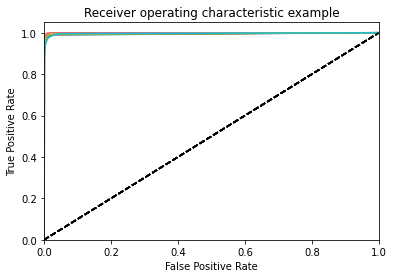

In [83]:
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
plt.show()